## Import

In [167]:
import pickle
import os
import pandas as pd
import matplotlib.pyplot as plt
from create_table_fpdf2 import PDF

### Open the pickle

In [168]:
pickle_file = 'dataframes.pkl'
if os.path.exists(pickle_file):
	with open(pickle_file, 'rb') as file:
		dataframes = pickle.load(file)

### National analysis

In [169]:
regex='^voix(?!.*ratio)(?!.*T2)'
votes_per_candidates = dataframes['2022'].filter(regex=regex).columns.tolist()
columns_kept = ['dep', 'nomdep', 'exprimes'] + votes_per_candidates
columns_kept

['dep',
 'nomdep',
 'exprimes',
 'voixARTHAUD',
 'voixPOUTOU',
 'voixROUSSEL',
 'voixMELENCHON',
 'voixJADOT',
 'voixHIDALGO',
 'voixLASSALLE',
 'voixMACRON',
 'voixPECRESSE',
 'voixZEMMOUR',
 'voixDUPONTAIGNAN',
 'voixMLEPEN']

Consolidate data around:
- First round
- Per departement
- Votes on the political spectrum

In [170]:
dataframes['2022'].loc[(dataframes['2022']['dep'] == '01') & (dataframes['2022']['exprimes'] %  1 != 0), 'exprimes']

7        227.999992
48     15991.999512
116      274.000008
235       90.000004
278      133.000004
306      853.000031
374      866.999969
Name: exprimes, dtype: float64

`Exprimes` is set to float, changing the data type to int and making sure it's correctly rounded.

In [171]:
dataframes['2022']['exprimes'] = dataframes['2022']['exprimes'].round(0).astype(int)


In [172]:
df_departement = {}
regex='^voix(?!.*ratio)(?!.*T2)'
for year, df in dataframes.items():
	# Moving to list might be a poor idea performance wise
	votes_per_candidates = dataframes[year].filter(regex=regex).columns.tolist()
	columns_kept = ['dep', 'nomdep', 'exprimes'] + votes_per_candidates
	df_departement[year] = df[columns_kept].groupby(['dep', 'nomdep']).sum().reset_index()
	

In [173]:
pd.set_option('display.max_rows', 100)
regex_votes = r'^voix'
sum_votes = df_departement['2022'].filter(regex=regex_votes).sum(axis=1)
check_votes = (df_departement['2022'].filter(regex=regex_votes).sum(axis=1) == df_departement['2022']['exprimes'])
check_votes

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
30    True
31    True
32    True
33    True
34    True
35    True
36    True
37    True
38    True
39    True
40    True
41    True
42    True
43    True
44    True
45    True
46    True
47    True
48    True
49    True
50    True
51    True
52    True
53    True
54    True
55    True
56    True
57    True
58    True
59    True
60    True
61    True
62    True
63    True
64    True
65    True
66    True
67    True
68    True
69    True
70    True
71    True
72    True
73    True
74    True
75    True
76    True
77    True
78    True
79    True
80    True
81    True
82    True
83    True
84    True
85    True
86    True
87    True
88    True
89    True
90    True

In [190]:
df_departement['2022']

,dep,nomdep,exprimes,voixARTHAUD,voixPOUTOU,voixROUSSEL,voixMELENCHON,voixJADOT,voixHIDALGO,voixLASSALLE,voixMACRON,voixPECRESSE,voixZEMMOUR,voixDUPONTAIGNAN,voixMLEPEN
0,01,Ain,333024,1658,2172,5938,57832,15843,5644,10876,92206,17572,27530,8998,86755
1,02,Aisne,265860,2038,2118,5968,41172,7074,2983,6468,58721,10920,18266,5790,104342
2,03,Allier,185955,1359,1503,8119,31013,5982,3280,7782,49706,10319,12361,4216,50315
3,04,Alpes-de-Haute-Provence,96683,505,865,2721,21856,3957,1396,4309,20800,3834,7926,2504,26010
4,05,Hautes-Alpes,86235,428,801,1925,19718,5013,1459,3871,20507,4511,6164,2142,19696
5,06,Alpes-Maritimes,558775,1627,2989,8858,92345,23374,5414,12767,139707,31260,78208,13307,148919
6,07,Ardèche,196975,1219,1817,5710,42837,8544,4189,9033,45353,9553,14199,4927,49594
7,08,Ardennes,133936,1081,1112,3009,22281,3446,1741,4084,31656,5556,8771,2957,48242
8,09,Ariège,91704,417,723,2701,23908,3020,3208,7532,18071,2724,5821,1621,21958
9,10,Aube,149670,1005,1062,3094,22483,4619,1720,3787,38321,8923,11374,3966,49316


In [174]:
df_departement['2022'].loc[['dep'] == '01', df_departement['2022'].filter(like='voix').columns]

,voixARTHAUD,voixPOUTOU,voixROUSSEL,voixMELENCHON,voixJADOT,voixHIDALGO,voixLASSALLE,voixMACRON,voixPECRESSE,voixZEMMOUR,voixDUPONTAIGNAN,voixMLEPEN
0,1658,2172,5938,57832,15843,5644,10876,92206,17572,27530,8998,86755


In [175]:
regex_candidate = r'^voix(.*)'
names = [re.match(regex_candidate, col).group(1) for col in df_departement['2022'].columns if re.match(regex_candidate, col)]

/tmp/ipykernel_12923/916945560.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'First Round {df_departement["2022"].iloc[0][1]}')


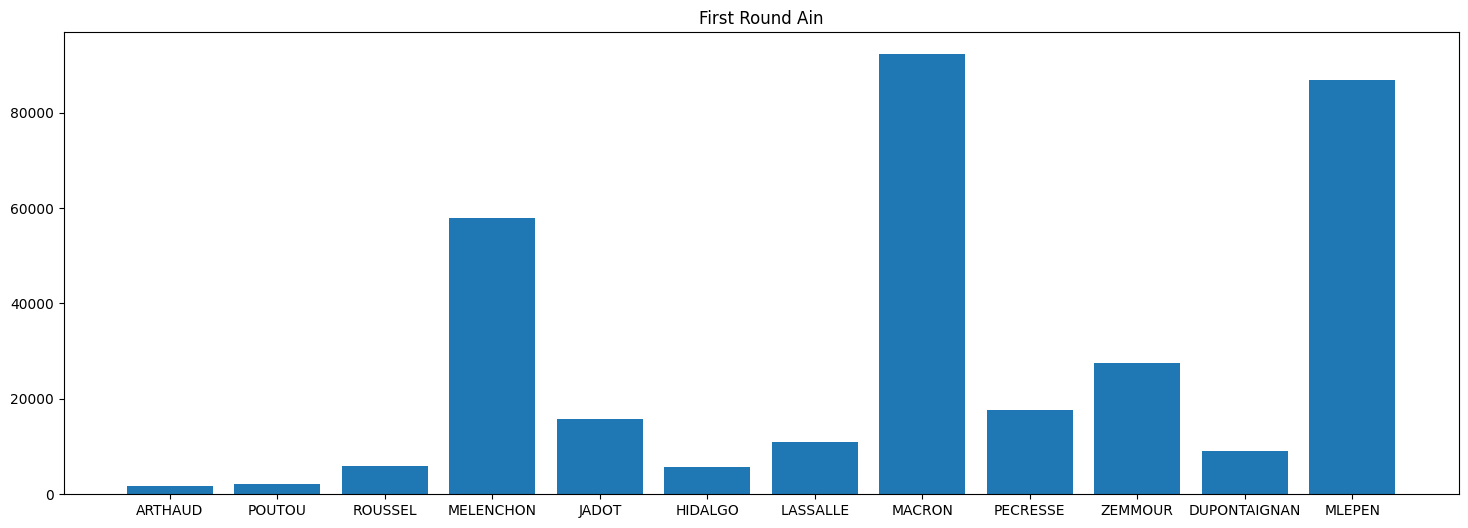

In [176]:
plt.figure(figsize=(18, 6))
plt.bar(names, df_departement['2022'].iloc[0][3:])
plt.title(f'First Round {df_departement["2022"].iloc[0][1]}')
plt.show()

In [209]:
class My_PDF(PDF):
	def __init__(self, orientation='P', unit='mm', format='Letter', year=None):
		super().__init__(orientation, unit, format)
		self.year = year

	def header(self):
		self.set_font('helvetica', 'B', 10)
		self.cell(0, 10, f'French presidential election {self.year}', border=False, ln=1, align='C')
		self.ln(20)

	def footer(self):
		self.set_y(-15)
		self.set_font('helvetica', 'I', 8)
		self.cell(0, 10, f'Page {self.page_no()}/{{nb}}', align='C')

In [210]:
output_dir = 'graphs'
os.makedirs(output_dir, exist_ok=True)
num_cols = 2
num_rows = 48
regex_candidate = r'^voix(.*)'
pdf = My_PDF('P', 'mm', 'Letter', 2022)
pdf.set_auto_page_break(auto=True, margin=15)
x = 10  # X-coordinate
y = 50  # Y-coordinate
width = 180  # Image width
height = 70  # Image height
for i, nomdep in enumerate(df_departement['2022']['nomdep'].unique()):
	plt.figure(figsize=(16, 6))
	names = [re.match(regex_candidate, col).group(1) for col in df_departement['2022'].columns if re.match(regex_candidate, col)]
	dep_data = df_departement['2022'].iloc[i][3:]
	plt.bar(names, dep_data)
	output_file = os.path.join(output_dir, f'{nomdep}.png')
	plt.savefig(output_file, bbox_inches='tight')
	plt.close()
	pdf.add_page()
	pdf.set_font("Times", size=20)
	pdf.cell(40, 0, f'{nomdep}', ln=True)
	pdf.set_auto_page_break(auto=True, margin=15)
	pdf.image(output_file, x, y, width, height)
	pdf.set_font("Times", size=10)
	# print([str(score / df_departement['2022'].iloc[i][2]) for score in dep_data)])
	table_data = {
		'Candidate': names,
		'Nb of Votes': [str(score) for score in dep_data],
		# str(score / df_departement['2022'].iloc[i][2])
		'Percentage of votes': [f"{score / df_departement['2022'].iloc[i][2] * 100:.2f}%" for score in dep_data]
	}
	pdf.create_table(table_data=table_data, title=f'Number of votes received', cell_width='even')
pdf.output('2022.pdf')

/tmp/ipykernel_12923/203239975.py:8: DeprecationWarning: The parameter "ln" is deprecated. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, f'French presidential election {self.year}', border=False, ln=1, align='C')
/tmp/ipykernel_12923/3690290897.py:22: DeprecationWarning: The parameter "ln" is deprecated. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(40, 0, f'{nomdep}', ln=True)
/tmp/ipykernel_12923/3690290897.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Percentage of votes': [f"{score / df_departement['2022'].iloc[i][2] * 100:.2f}%" for score in dep_data]
